# Desafio - Meu primeiro modelo com Scikit-Learn

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [82]:
#Transformar os dados em um DataFrame

dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df_dados_vendas = pd.DataFrame(dados_vendas)

df_dados_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [83]:
df_dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [84]:
#Adicionar uma coluna para representar os meses numericamente
df_dados_vendas['mes_num'] = range(1, 13)

df_dados_vendas.head(2)

,mes,vendas,mes_num
0,Janeiro,2000,1
1,Fevereiro,2200,2


In [85]:
#  Dividir os dados em conjuntos de treinamento e teste

X = df_dados_vendas[['mes_num']]
Y = df_dados_vendas['vendas']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size=0.7, random_state=51)


In [86]:
model = LinearRegression()
model.fit(X_Train, Y_Train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
y_pred = model.predict(X_Test)
mae = mean_absolute_error(Y_Test, y_pred)
mse = mean_squared_error(Y_Test, y_pred)
r2 = r2_score(Y_Test, y_pred)


In [94]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2096.1805555555525
Mean Absolute Error: 36.66666666666663
R^2 Score: 0.9631440781440782


In [89]:
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 1963.3333333333333
Coeficiente: [114.16666667]


In [90]:
previsao_dezembro = model.predict([[12]])
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3333.33


c:\Users\luan.albuquerque\.virtualenvs\modelo_diabetes-BXlDS_ff\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


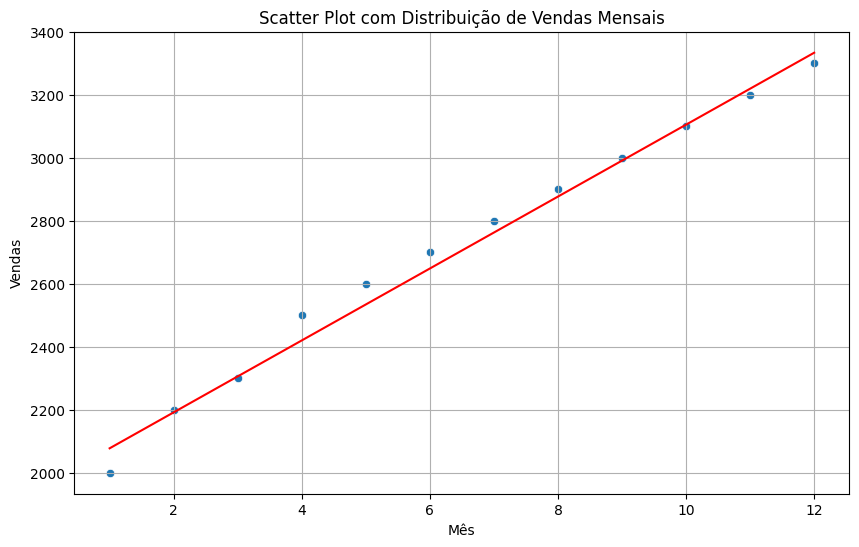

In [91]:
# Plot de Scatter com distribuição
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_num', y='vendas', data=df_dados_vendas)
plt.plot(df_dados_vendas['mes_num'], model.predict(df_dados_vendas[['mes_num']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()


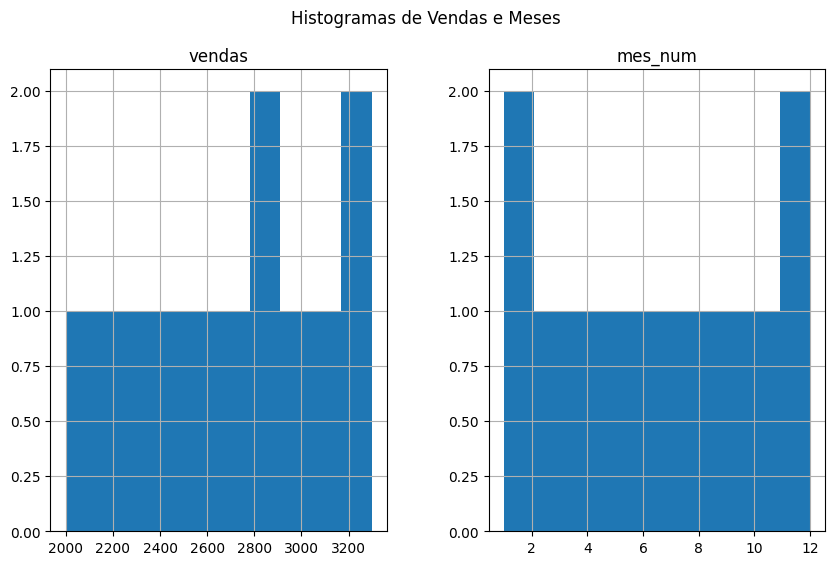

In [92]:
# Histograma de todas as variáveis
df_dados_vendas.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()